# Lesson 1 Assignment - EnergyLoads
## Author - Dustin Burnham

### Instructions
In this exercise you will use visualization and summary statistical methods to explore a data set. You will be looking for interesting aspects in these data. Specifically, you will explore an energy efficiency data set.

This data set contains characteristics of over 750 buildings. The efficiency of the building is measured as either heating load or cooling load. Your goal is to find **three interesting relationships within the variables** which help you understand the energy efficiency of these buildings.

The exercise is deliberately open-ended. Whenever you approach a new data set some open-ended exploration is required. Expect this exploration to be an iterative process. You may need to try several ideas before you find truly interesting relationships.

The key points come from examining charts and summary statistics based on distribution Heating Load and Cooling Load. 
<font color="blue">At the end of this notebook include Markdown cells outlining your 3 key points.</font>

Example description:  The heating load of buildings depends on ... Evidence for this relationship can be seen by ... in the figure and by noting .... in the table above. 


#### Tip: 
There are no categorical variables in this data set. There are two numeric variables, Orientation and Glazing Area Distribution, with only 4 and 2 discrete values. You can convert these integer values to factors and examine the effect on the distribution of Heating Load and Cooling Load.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Load Data
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/EnergyEfficiencyData.csv"
energy = pd.read_csv(fileName)

In [3]:
# Check out the data types
energy.dtypes

Relative Compactness         float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                    int64
Glazing Area                 float64
Glazing Area Distribution      int64
Heating Load                 float64
Cooling Load                 float64
dtype: object

In [4]:
# Try plotting to look for relationships

#plt.scatter(energy.loc[:,"Overall Height"], energy.loc[:,"Cooling Load"],color='k')
#plt.scatter(energy.loc[:,"Relative Compactness"], energy.loc[:,"Heating Load"],color='r')
#plt.hist(energy.loc[:,"Relative Compactness"])
#plt.hist(energy.loc[:,"Surface Area"], bins=30)
#plt.hist(energy.loc[:,"Wall Area"], bins=30) # Maybe
#plt.hist(energy.loc[:,"Roof Area"])
#plt.hist(energy.loc[:,"Orientation"])
#plt.hist(energy.loc[:,"Glazing Area"])
#plt.hist(energy.loc[:,"Glazing Area Distribution"])
#plt.hist(energy.loc[:,"Heating Load"])
#plt.hist(energy.loc[:,"Cooling Load"])

#plt.show()

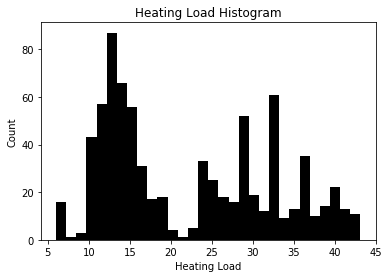

In [5]:
plt.hist(energy["Heating Load"], color='k', bins=30)
plt.xlabel("Heating Load")
plt.ylabel("Count")
plt.title("Heating Load Histogram")
plt.show()

## Interesting Relationship 1: Overall Height
</br>
My first investigation will be to see how overall height effects the heating load.  To begin I will look at the data using a simple box plot showing heating load vs. the two overall height categories.  What we observe for the two different height classifications, is that they have significantly different heating loads.  The smaller overall height has a smaller heating load, and the larger overall height has a larger heating load.  There is notably not much overlap as well.  Only the whiskers of this plot overlap, the IQRs are non-overlapping.  To investigate further, I will look at descriptive statistics of the heating load grouped by overall height.  Namely the median, standard deviation, count, minimum, and maximum values.  The median values differ by multiple standard deviations, so I believe the overall height definitely affects the energy efficiency of a building.  The statistics can be viewed in the table below.

In [6]:
# Descriptive statistics for heating load grouped by overall height.
energy[['Overall Height', 'Heating Load']].groupby(['Overall Height']).agg(['median', 'std', 'count', 'min', 'max']).sort_values(by='Overall Height')

Heating Load                              
                     median       std count    min    max
Overall Height                                           
3.5                  12.985  2.671730   384   6.01  19.52
7.0                  31.675  5.954589   384  15.55  43.10

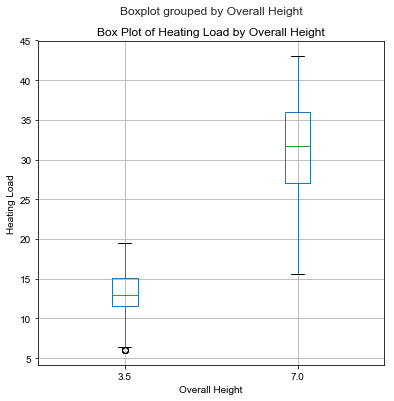

In [7]:
# Box plot of heating load grouped by overall height.
fig = plt.figure(figsize=(6,6)) # Define plot area
ax = fig.gca() # Define axis 
sns.set_style("whitegrid")
energy.loc[:,['Overall Height', 'Heating Load']].boxplot(by = 'Overall Height', ax=ax)
ax.set_title('Box Plot of Heating Load by Overall Height') # Give the plot a main title
ax.set_xlabel('Overall Height') # Set text for the x axis
ax.set_ylabel('Heating Load')# Set text for y axis
plt.show()

## Interesting Relationship 2: Roof Area
</br>
The second relationship that I chose to investigate was the relationship between roof area and cooling load.  Once again I began by looking at a box plot of cooling area by the 4 measurements of roof area.  What I noticed was that the IQR for the cooling load stays relatively consistent for the first 3 roof area measurements, but experiences a sharp decline for the final and largest roof area.  After looking at the median, standard deviation, count, min, and max (seen in the roof area section), I think there is something here, but we will need to consolidate measurments with binning.  I think this because the count for each roof area measurement varies quite a bit, with the 220.5 measurement having just as many measurements as the other three categories.  Because of this I will group them into small and large roof categories and look at the statistics again.  After binning, the difference in cooling load is much more significant, with there only being whisker overlap.  I believe this relationship is significant because of the difference in the medians.  Each is multiple standard deviations from the other, so I would say the odds of us observing this relationship with 700+ data points is quite low.

Text(0,0.5,'Cooling Load')

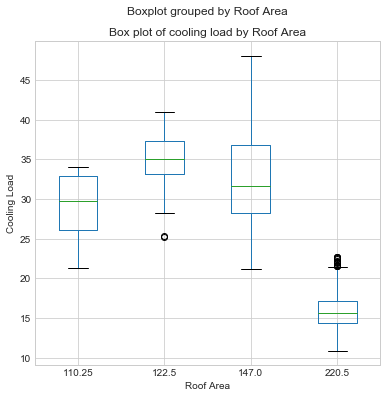

In [8]:
# Box plot of cooling load grouped by roof area.
fig = plt.figure(figsize=(6,6)) # Define plot area
ax = fig.gca() # Define axis 
sns.set_style("whitegrid")
energy.loc[:,['Roof Area', 'Cooling Load']].boxplot(by = 'Roof Area', ax=ax)
ax.set_title('Box plot of cooling load by Roof Area') # Give the plot a main title
ax.set_xlabel('Roof Area') # Set text for the x axis
ax.set_ylabel('Cooling Load')# Set text for y axis

In [9]:
# Descriptive statistics of cooling load grouped by roof area.
energy[['Roof Area', 'Cooling Load']].groupby(['Roof Area']).agg(['median', 'std', 'count', 'min', 'max']).sort_values(by='Roof Area')

Cooling Load                              
                median       std count    min    max
Roof Area                                           
110.25           29.73  3.603782    64  21.33  34.01
122.50           34.99  3.433696   128  25.16  40.99
147.00           31.65  6.336927   192  21.16  48.03
220.50           15.61  2.420797   384  10.90  22.73

In [10]:
# Binning of roof area.  < 220.5 == "Small Roof".  Otherwise == "Large Roof"

small_roof_flag = energy.loc[:,"Roof Area"] < 220.5

energy.loc[small_roof_flag,"Roof Area"] = "Small Roof"
energy.loc[~small_roof_flag,"Roof Area"] = "Large Roof"

In [11]:
# Descriptive statistics of cooling load grouped by roof area after binning.
energy[['Roof Area', 'Cooling Load']].groupby(['Roof Area']).agg(['median', 'std', 'count', 'min', 'max'])

Cooling Load                              
                 median       std count    min    max
Roof Area                                            
Large Roof       15.610  2.420797   384  10.90  22.73
Small Roof       33.135  5.472439   384  21.16  48.03

Text(0,0.5,'Cooling Load')

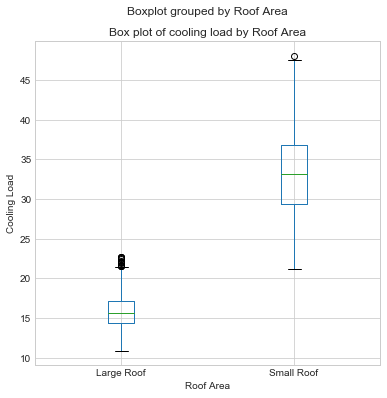

In [12]:
# Box plots of cooling load grouped by roof area after binning.
fig = plt.figure(figsize=(6,6)) # Define plot area
ax = fig.gca() # Define axis 
sns.set_style("whitegrid")
energy.loc[:,['Roof Area', 'Cooling Load']].boxplot(by = 'Roof Area', ax=ax)
ax.set_title('Box plot of cooling load by Roof Area') # Give the plot a main title
ax.set_xlabel('Roof Area') # Set text for the x axis
ax.set_ylabel('Cooling Load')# Set text for y axis

## Interesting Relationship 3: Wall Area
</br>
My next thought for what might affect energy efficiency is the wall area factor.  To begin I made box plots, a histogram of the wall area, and viewed the unique values for the wall area.  Wall area comes in increments of 24.5.  After looking at the counts, I thought these values could be binned to make the increments more comparable.  I made equal sized bins and gave them labels of small, medium-small, medium, medium-large, large.  These bins consolidated the unique values into 5 bins.  A key characteristic that I noticed in the median cooling load definitely changes as the wall area changes.  However the trend is not consistent, so that leads me to believe that this change we see might be the result of a confounding variable.  Additionally, there is a significant amount of overlap with the IQR, and as a result I would say there is no obvious visual statistical significance in this relationship.  More testing is necessary.  The before binning and after binning descriptive statistics are in the two tables of the wall area section of this notebook

In [13]:
energy['Wall Area'].unique()

array([294. , 318.5, 343. , 416.5, 245. , 269.5, 367.5])

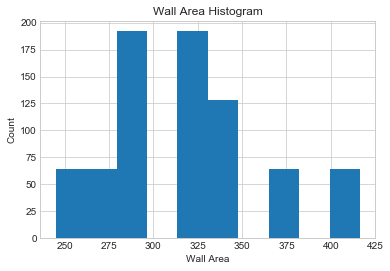

In [14]:
# Distribution of wall area measurements
plt.hist(energy["Wall Area"])
plt.xlabel("Wall Area")
plt.ylabel("Count")
plt.title("Wall Area Histogram")
plt.show()

Text(0,0.5,'Cooling Load')

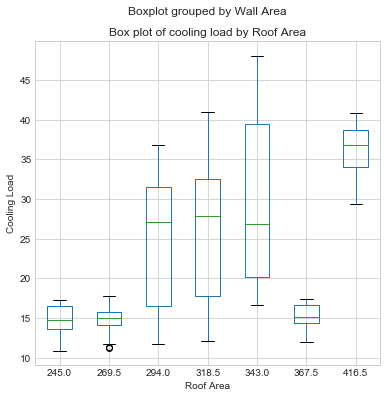

In [15]:
# Box plot of cooling load grouped by wall area.
fig = plt.figure(figsize=(6,6)) # Define plot area
ax = fig.gca() # Define axis 
sns.set_style("whitegrid")
energy.loc[:,['Wall Area', 'Cooling Load']].boxplot(by = 'Wall Area', ax=ax)
ax.set_title('Box plot of cooling load by Roof Area') # Give the plot a main title
ax.set_xlabel('Roof Area') # Set text for the x axis
ax.set_ylabel('Cooling Load')# Set text for y axis

In [16]:
# Descriptive statistics of cooling load grouped by wall area.
energy[['Wall Area', 'Cooling Load']].groupby(['Wall Area']).agg(['median', 'std', 'count', 'min', 'max'])

Cooling Load                               
                median        std count    min    max
Wall Area                                            
245.0           14.785   1.659840    64  10.90  17.32
269.5           14.955   1.502668    64  11.27  17.74
294.0           27.100   7.646257   192  11.73  36.86
318.5           27.885   7.973868   192  12.14  40.99
343.0           26.830  10.567328   128  16.67  48.03
367.5           15.105   1.384389    64  12.04  17.38
416.5           36.860   2.902604    64  29.40  40.85

In [17]:
# Binning of wall area

wall_area = energy.loc[:,"Wall Area"]
bins = 4

bin_width = (max(wall_area) - min(wall_area))/bins
min_bin1 = float('-inf')
max_bin1 = 290.0
max_bin2 = 300.0
max_bin3 = 320.0
max_bin4 = 350
max_bin5 = float('inf')

eqBinnedWA = np.empty(len(wall_area), object)
eqBinnedWA[(min_bin1 < wall_area) & (wall_area <= max_bin1)] = "small"
eqBinnedWA[(max_bin1 < wall_area) & (wall_area <= max_bin2)] = "med-small"
eqBinnedWA[(max_bin2 < wall_area) & (wall_area <= max_bin3)] = "medium"
eqBinnedWA[(max_bin3 < wall_area) & (wall_area <= max_bin4)] = "med-large"
eqBinnedWA[(max_bin4 < wall_area) & (wall_area <= max_bin5)] = "large"


energy.loc[:,"Wall Area"] = eqBinnedWA

Text(0,0.5,'Cooling Load')

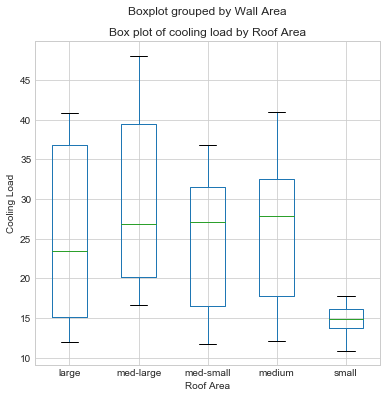

In [18]:
# Box plot of cooling load grouped by wall area after binning.
fig = plt.figure(figsize=(6,6)) # Define plot area
ax = fig.gca() # Define axis 
sns.set_style("whitegrid")
energy.loc[:,['Wall Area', 'Cooling Load']].boxplot(by = 'Wall Area', ax=ax)
ax.set_title('Box plot of cooling load by Roof Area') # Give the plot a main title
ax.set_xlabel('Roof Area') # Set text for the x axis
ax.set_ylabel('Cooling Load')# Set text for y axis

In [19]:
energy[['Wall Area', 'Cooling Load']].groupby(['Wall Area']).agg(['median', 'std', 'count', 'min', 'max'])

Cooling Load                               
                median        std count    min    max
Wall Area                                            
large           23.390  10.861916   128  12.04  40.85
med-large       26.830  10.567328   128  16.67  48.03
med-small       27.100   7.646257   192  11.73  36.86
medium          27.885   7.973868   192  12.14  40.99
small           14.930   1.581022   128  10.90  17.74

# Summary

### Interesting Relationship 1: Overall Height
</br>
My first investigation will be to see how overall height effects the heating load.  To begin I will look at the data using a simple box plot showing heating load vs. the two overall height categories.  What we observe for the two different height classifications, is that they have significantly different heating loads.  The smaller overall height has a smaller heating load, and the larger overall height has a larger heating load.  There is notably not much overlap as well.  Only the whiskers of this plot overlap, the IQRs are non-overlapping.  To investigate further, I will look at descriptive statistics of the heating load grouped by overall height.  Namely the median, standard deviation, count, minimum, and maximum values.  The median values differ by multiple standard deviations, so I believe the overall height definitely affects the energy efficiency of a building.  The statistics can be viewed in the table below.

### Interesting Relationship 2: Roof Area
</br>
The second relationship that I chose to investigate was the relationship between roof area and cooling load.  Once again I began by looking at a box plot of cooling area by the 4 measurements of roof area.  What I noticed was that the IQR for the cooling load stays relatively consistent for the first 3 roof area measurements, but experiences a sharp decline for the final and largest roof area.  After looking at the median, standard deviation, count, min, and max (seen in the roof area section), I think there is something here, but we will need to consolidate measurments with binning.  I think this because the count for each roof area measurement varies quite a bit, with the 220.5 measurement having just as many measurements as the other three categories.  Because of this I will group them into small and large roof categories and look at the statistics again.  After binning, the difference in cooling load is much more significant, with there only being whisker overlap.  I believe this relationship is significant because of the difference in the medians.  Each is multiple standard deviations from the other, so I would say the odds of us observing this relationship with 700+ data points is quite low.

### Interesting Relationship 3: Wall Area
</br>
My next thought for what might affect energy efficiency is the wall area factor.  To begin I made box plots, a histogram of the wall area, and viewed the unique values for the wall area.  Wall area comes in increments of 24.5.  After looking at the counts, I thought these values could be binned to make the increments more comparable.  I made equal sized bins and gave them labels of small, medium-small, medium, medium-large, large.  These bins consolidated the unique values into 5 bins.  A key characteristic that I noticed in the median cooling load definitely changes as the wall area changes.  However the trend is not consistent, so that leads me to believe that this change we see might be the result of a confounding variable.  Additionally, there is a significant amount of overlap with the IQR, and as a result I would say there is no obvious visual statistical significance in this relationship.  More testing is necessary.  The before binning and after binning descriptive statistics are in the two tables of the wall area section of this notebook